In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


from rfest import splineLG, splineLNP, splineLNLN
from rfest.utils import fetch_data, split_data, upsample_data
from rfest.utils import get_n_samples, build_design_matrix
from rfest.plot import plot3d, plot_subunits3d, plot_nonlinearity

In [44]:
data = fetch_data(5)

(Ran, et al. 2020) is already downloaded. To re-download the same file, please set `overwrite=False`.
Loading data (Ran, et al. 2020)...
Done.


In [59]:
df = [7, 9, 7]
dims = [25, 20, 15]

stim = data['stim']
stim[stim == 0.] = -1.
trace = data['C3']['cal']['soma']['trace']
tracetime = data['C3']['cal']['soma']['tracetime']
triggertime = data['C3']['cal']['soma']['triggertime']

X, y, dt = upsample_data(stim, triggertime, trace, tracetime)
X = build_design_matrix(X, dims[0])
(X_train, y_train), (X_dev, y_dev), (X_test, y_test) = split_data(X, gaussian_filter(y, sigma=2, truncate=0.25), dt, frac_train=0.8, frac_dev=0.1)

SUMMARY
               N    Minutes   Fraction
Total       9377        5.0        1.0
Train       7500        4.0        0.8
Dev          937        0.5        0.1
Test         940        0.5        0.1


Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	     0.460	     0.336	     0.331	    -0.041	    -0.012
  300	     3.787	     0.049	     0.047	     0.218	     0.147
Stop at 301 steps: cost (train) has been changing less than 1e-5 for 10 steps.

Total time elapsed: 3.799 s.


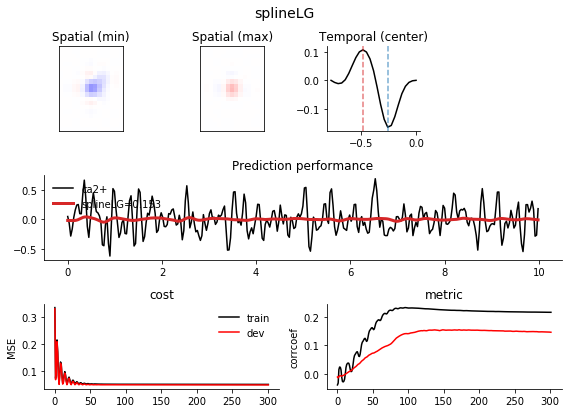

In [23]:
lg = splineLG(X_train, y_train, dims=dims, dt=dt, df=df)
lg.fit(extra={'X': X_dev, 'y': y_dev}, metric='corrcoef',
      num_iters=3000, verbose=300, tolerance=10,
      beta=0.001)
plot3d(lg, X_test, y_test, len_time=10, response_type='ca2+')

Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	     0.520	     0.330	     0.326	     0.320	     0.331
  300	     3.959	     0.044	     0.042	     0.363	     0.357
Stop at 301 steps: cost (train) has been changing less than 1e-5 for 10 steps.

Total time elapsed: 3.970 s.


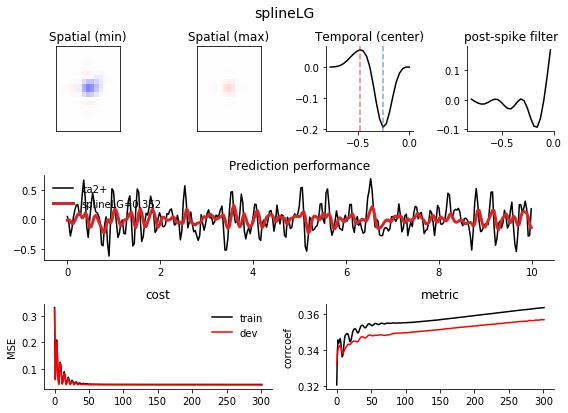

In [25]:
lg_hist = splineLG(X_train, y_train, dims=dims, dt=dt, df=df)
lg_hist.initialize_history_filter(dims=dims[0], df=df[0])
lg_hist.fit(extra={'X': X_dev, 'y': y_dev}, metric='corrcoef',
      num_iters=3000, verbose=300, tolerance=10,
      beta=0.001, fit_history_filter=True)
plot3d(lg_hist, X_test, y_test, len_time=10, response_type='ca2+')

Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	     0.717	   180.932	    24.153	     0.245	     0.198
  300	     6.182	    17.109	     9.865	     0.289	     0.243
  600	    13.565	     3.300	     8.565	     0.330	     0.285
  900	    20.953	    -6.089	     7.665	     0.345	     0.299
 1200	    28.373	   -10.953	     7.152	     0.348	     0.305
 1500	    35.803	   -13.294	     6.876	     0.346	     0.307
 1800	    43.297	   -14.218	     6.754	     0.344	     0.306
 2100	    50.760	   -14.667	     6.718	     0.344	     0.306
 2400	    58.247	   -14.990	     6.717	     0.344	     0.306
Stop at 2577 steps: cost (dev) has been monotonically increasing for 10 steps.

Total time elapsed: 62.674 s.


<Figure size 576x288 with 0 Axes>

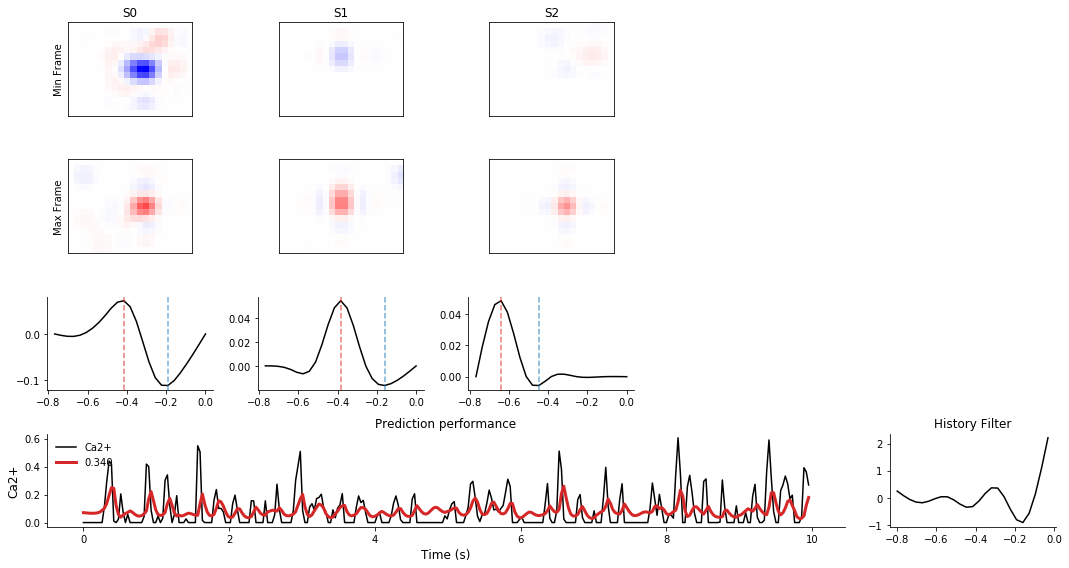

In [60]:
lnln = splineLNLN(X_train, np.maximum(y_train, 0), dims=dims, dt=dt, df=df)
lnln.initialize_history_filter(dims=dims[0], df=df[0])
lnln.fit(extra={'X': X_dev, 'y': np.maximum(y_dev, 0)}, metric='corrcoef', 
         num_subunits=3, num_iters=3000, verbose=300, tolerance=10,
         beta=0.25, step_size=0.01,
         fit_history_filter=True)
plot_subunits3d(lnln, X_test, np.maximum(y_test, 0), dt=dt, len_time=10, response_type='Ca2+')